In [ ]:
import pandas as pd
import numpy as np
import os
import warnings

import pandas as pd
import numpy as np


from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font='Malgun Gothic',
       rc={'axes.unicode_minus':False})

fold_dir = 'C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/final_data/'

In [ ]:
data = pd.read_pickle(fold_dir+'final_data_0601.pkl')
data.shape

In [3]:
pd.options.display.max_columns=30

In [4]:
data.isnull().sum()

주간날짜                0
번식우                 0
번식우_no              0
번식우_편차              0
번식우_no_편차           0
미국소_생산량(가격화한값)      0
돼지가격_평균             0
명절유무                0
한우가격_당일값_편차         1
한우가격_당일값            0
한우가격_미래값(y값)_MA     2
한우가격_미래값(y값)        0
lag1_price          1
lag5_price          5
lag10_price        10
lag20_price        20
평균기온                0
최저기온                0
최고기온                0
합계일조시간              0
합계일사                0
최대 순간 풍속            0
최대 풍속(m/s)          0
평균지면온도              0
최소상대습도(%)           0
평균상대습도(%)           0
일강수량               41
dtype: int64

In [5]:
# 일강수량 결측치가 데이터 중간중간에 다 껴있어서...그냥 feature로 사용안하는게 나을 듯함..
del data['일강수량']
data.columns

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA',
       '한우가격_미래값(y값)', 'lag1_price', 'lag5_price', 'lag10_price',
       'lag20_price', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속',
       '최대 풍속(m/s)', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)'],
      dtype='object')

In [6]:
lag_data = data.iloc[20:,]
lag_data.isnull().sum()

주간날짜               0
번식우                0
번식우_no             0
번식우_편차             0
번식우_no_편차          0
미국소_생산량(가격화한값)     0
돼지가격_평균            0
명절유무               0
한우가격_당일값_편차        0
한우가격_당일값           0
한우가격_미래값(y값)_MA    0
한우가격_미래값(y값)       0
lag1_price         0
lag5_price         0
lag10_price        0
lag20_price        0
평균기온               0
최저기온               0
최고기온               0
합계일조시간             0
합계일사               0
최대 순간 풍속           0
최대 풍속(m/s)         0
평균지면온도             0
최소상대습도(%)          0
평균상대습도(%)          0
dtype: int64

In [7]:
data_names = lag_data.drop(['주간날짜','한우가격_미래값(y값)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
print(features)

['번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)', '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA', 'lag1_price', 'lag5_price', 'lag10_price', 'lag20_price', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속', '최대 풍속(m/s)', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)']


In [8]:
len(features)

24

In [12]:
def mean_absolute_percentage_error(y_true, y_pred): 
    

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
train = pd.read_pickle(fold_dir+'train_0602.pkl')
test = pd.read_pickle(fold_dir+'test_0602.pkl')
print(train.shape)
print(test.shape)

(220, 26)
(54, 26)


In [18]:
data_names = train.drop(['주간날짜','한우가격_미래값(y값)'],axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
print(features)

['번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)', '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA', 'lag1_price', 'lag5_price', 'lag10_price', 'lag20_price', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속', '최대 풍속(m/s)', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)']


# lag 변수포함 모델링

[00:22:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


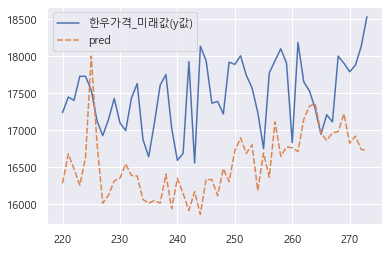

MAE : 935.5917932581018
train_score : 0.9938000897663694
test_score : -4.2020464019236705

test_r2_score : -4.2020464019236705
MAPE(%단위) : 5.304964797365803
RMSE :  1064.5439398915073
-----Fold종료-----


In [23]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
import xgboost as xgb

#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MinMaxScaler()
accrs = []

train_d, test_d = train, test
    
pca = PCA(n_components=16,random_state=1)
    
train_y = train_d['한우가격_미래값(y값)']
train_x = train_d[features]
train_x = scaler.fit_transform(train_x)
train_x = pca.fit_transform(train_x)
    
test_y = test_d['한우가격_미래값(y값)']
test_x = test_d[features]
test_x = scaler.transform(test_x)
test_x = pca.transform(test_x)
    
#model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                     #batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
model = xgb.XGBRegressor(random_state=42)
model.fit(train_x, train_y)
        
pred = model.predict(test_x)

test = pd.concat([test_d[features],test_y],axis=1)
test['pred'] = pred    
    
plt.figsize = (15,10)
sns.lineplot(data = test[['한우가격_미래값(y값)','pred']])
plt.show()
MAE = mean_absolute_error(test['한우가격_미래값(y값)'],pred)
print('MAE :', MAE)
    
train_score = model.score(train_x, train_y)
test_score = model.score(test_x, test_y)
    
test_r2_score = r2_score(test['한우가격_미래값(y값)'], pred)
    
mape = mean_absolute_percentage_error(test['한우가격_미래값(y값)'], pred)
rmse = np.sqrt(mean_squared_error(test['한우가격_미래값(y값)'],pred))
print("train_score :",train_score)
print("test_score :", test_score)
print()
print("test_r2_score :", test_r2_score)
print("MAPE(%단위) :", mape)
print("RMSE : ", rmse)
print('-----Fold종료-----')
    
    
    
#print(np.average(accrs))

# lag변수 제외 모델링

In [38]:
cols = data.columns
lag_cols = cols[cols.str.contains('lag')]
no_lag_data = data.drop(lag_cols, axis=1)
no_lag_data.columns

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA',
       '한우가격_미래값(y값)', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속',
       '최대 풍속(m/s)', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)'],
      dtype='object')

In [41]:
data_names = no_lag_data.drop(['주간날짜','한우가격_미래값(y값)'], axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
print(features)

['번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)', '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속', '최대 풍속(m/s)', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)']


In [48]:
no_lag_data = no_lag_data.iloc[2:,]

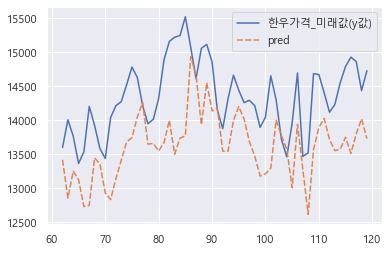

MAE : 720.1159752496467
train_score : 0.8773655060183143
test_score : -1.6056627191528614

test_r2_score : -1.6056627191528614
-----Fold종료-----


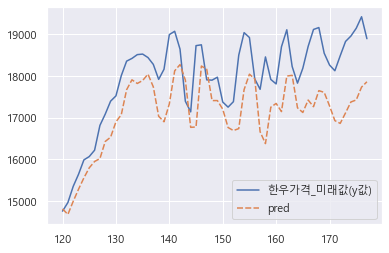

MAE : 866.3220215032882
train_score : 0.8780878158710597
test_score : 0.09908152720476515

test_r2_score : 0.09908152720476515
-----Fold종료-----


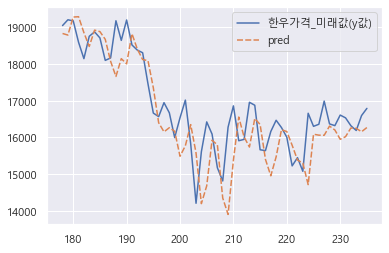

MAE : 597.3642753307806
train_score : 0.961460765637396
test_score : 0.5929274551085089

test_r2_score : 0.5929274551085089
-----Fold종료-----


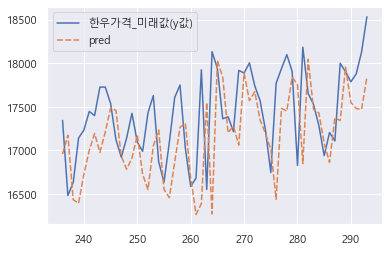

MAE : 456.50044067960437
train_score : 0.9534576307879876
test_score : -0.5515148390580946

test_r2_score : -0.5515148390580946
-----Fold종료-----


In [49]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MinMaxScaler()
tss = TimeSeriesSplit(n_splits=4)
accrs = []


for train_idx, test_idx in tss.split(no_lag_data):
    train_d, test_d = no_lag_data.iloc[train_idx], no_lag_data.iloc[test_idx]
    
    pca = PCA(n_components=16,random_state=1)
    
    train_y = train_d['한우가격_미래값(y값)']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우가격_미래값(y값)']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우가격_미래값(y값)','pred']])
    plt.show()
    MAE = mean_absolute_error(test['한우가격_미래값(y값)'],pred)
    print('MAE :', MAE)
    
    train_score = model.score(train_x, train_y)
    test_score = model.score(test_x, test_y)
    
    test_r2_score = r2_score(test['한우가격_미래값(y값)'], pred)
    
    
    print("train_score :",train_score)
    print("test_score :", test_score)
    print()
    print("test_r2_score :", test_r2_score)
    print('-----Fold종료-----')

# lag변수, 기상변수 모두 제외한 모델링

In [50]:
no_lag_data.columns

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '명절유무', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA',
       '한우가격_미래값(y값)', '평균기온', '최저기온', '최고기온', '합계일조시간', '합계일사', '최대 순간 풍속',
       '최대 풍속(m/s)', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)'],
      dtype='object')

In [51]:
# 명절유무도 추가로 제외함
columns = ['주간날짜','번식우','번식우_no','번식우_편차','번식우_no_편차','미국소_생산량(가격화한값)',
          '돼지가격_평균','한우가격_당일값_편차','한우가격_당일값','한우가격_미래값(y값)_MA','한우가격_미래값(y값)']
except_data = no_lag_data[columns]
except_data.columns

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA',
       '한우가격_미래값(y값)'],
      dtype='object')

In [53]:
data_names = except_data.drop(['주간날짜','한우가격_미래값(y값)'], axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
print(features)

['번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)', '돼지가격_평균', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA']


In [56]:
len(features)

9

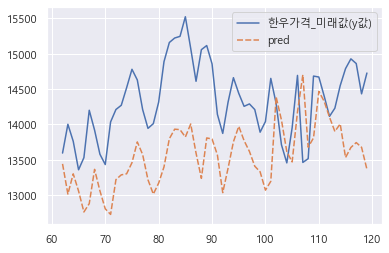

MAE : 840.351868301024
train_score : 0.829540729700521
test_score : -2.2780254971431178

test_r2_score : -2.2780254971431178
-----Fold종료-----


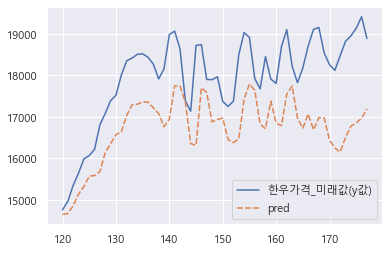

MAE : 1222.1587823045943
train_score : 0.8532200598820137
test_score : -0.6598336721081715

test_r2_score : -0.6598336721081715
-----Fold종료-----


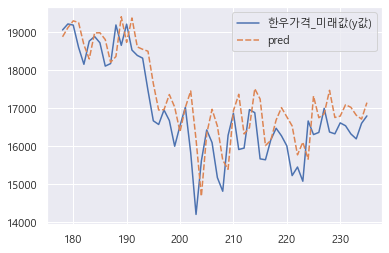

MAE : 606.1415156808688
train_score : 0.9605594108935211
test_score : 0.6349462747962251

test_r2_score : 0.6349462747962251
-----Fold종료-----


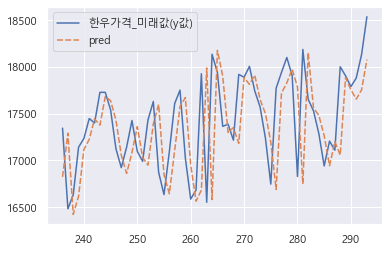

MAE : 392.82858422151236
train_score : 0.9483123623975552
test_score : -0.26021541656753544

test_r2_score : -0.26021541656753544
-----Fold종료-----


In [57]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MinMaxScaler()
tss = TimeSeriesSplit(n_splits=4)
accrs = []


for train_idx, test_idx in tss.split(except_data):
    train_d, test_d = except_data.iloc[train_idx], except_data.iloc[test_idx]
    
    pca = PCA(n_components=7,random_state=1)
    
    train_y = train_d['한우가격_미래값(y값)']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우가격_미래값(y값)']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우가격_미래값(y값)','pred']])
    plt.show()
    MAE = mean_absolute_error(test['한우가격_미래값(y값)'],pred)
    print('MAE :', MAE)
    
    train_score = model.score(train_x, train_y)
    test_score = model.score(test_x, test_y)
    
    test_r2_score = r2_score(test['한우가격_미래값(y값)'], pred)
    
    
    print("train_score :",train_score)
    print("test_score :", test_score)
    print()
    print("test_r2_score :", test_r2_score)
    print('-----Fold종료-----')

# 돼지가격 제외하고 모델링

In [58]:
except_data.columns

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA',
       '한우가격_미래값(y값)'],
      dtype='object')

In [59]:
data_names = except_data.drop(['주간날짜','한우가격_미래값(y값)','돼지가격_평균'], axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
print(features)

['번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA']


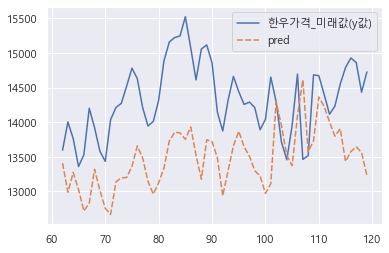

MAE : 905.8308626477071
train_score : 0.8294248571373812
test_score : -2.75413484786343

test_r2_score : -2.75413484786343
-----Fold종료-----


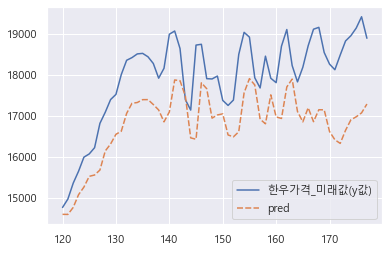

MAE : 1150.7900020673424
train_score : 0.8525242044183619
test_score : -0.4652314166319276

test_r2_score : -0.4652314166319276
-----Fold종료-----


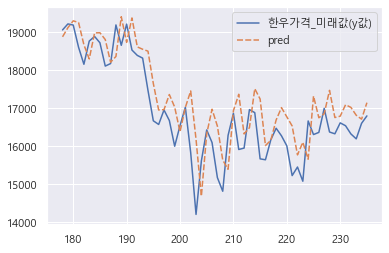

MAE : 605.967859079259
train_score : 0.960559108347409
test_score : 0.6350679556617174

test_r2_score : 0.6350679556617174
-----Fold종료-----


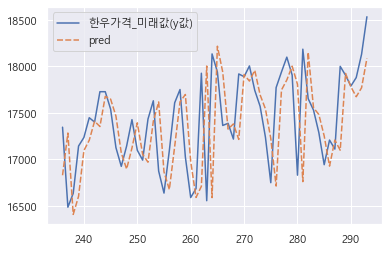

MAE : 394.2431906441945
train_score : 0.948267550840387
test_score : -0.25617792605313694

test_r2_score : -0.25617792605313694
-----Fold종료-----


In [60]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MinMaxScaler()
tss = TimeSeriesSplit(n_splits=4)
accrs = []


for train_idx, test_idx in tss.split(except_data):
    train_d, test_d = except_data.iloc[train_idx], except_data.iloc[test_idx]
    
    pca = PCA(n_components=7,random_state=1)
    
    train_y = train_d['한우가격_미래값(y값)']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우가격_미래값(y값)']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우가격_미래값(y값)','pred']])
    plt.show()
    MAE = mean_absolute_error(test['한우가격_미래값(y값)'],pred)
    print('MAE :', MAE)
    
    train_score = model.score(train_x, train_y)
    test_score = model.score(test_x, test_y)
    
    test_r2_score = r2_score(test['한우가격_미래값(y값)'], pred)
    
    
    print("train_score :",train_score)
    print("test_score :", test_score)
    print()
    print("test_r2_score :", test_r2_score)
    print('-----Fold종료-----')

# 미국소 생산량제외하고 모델링

In [61]:
data_names = except_data.drop(['주간날짜','한우가격_미래값(y값)','돼지가격_평균','미국소_생산량(가격화한값)'], axis=1).columns
data_names = [list(i) for i in data_names]
features = [''.join(i) for i in data_names]
print(features)

['번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '한우가격_당일값_편차', '한우가격_당일값', '한우가격_미래값(y값)_MA']


In [64]:
features = ['한우가격_당일값']

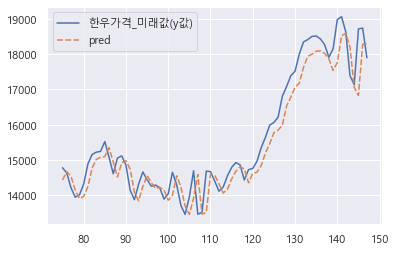

MAE : 403.14284958623415
train_score : 0.8020155670851937
test_score : 0.9088151923680421

test_r2_score : 0.9088151923680421
-----Fold종료-----


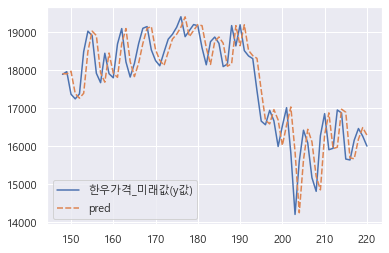

MAE : 485.1779192471236
train_score : 0.9393871721336661
test_score : 0.7662244206843719

test_r2_score : 0.7662244206843719
-----Fold종료-----


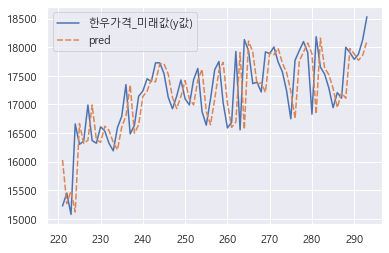

MAE : 394.949145173809
train_score : 0.9499268945493993
test_score : 0.3859529046117477

test_r2_score : 0.3859529046117477
-----Fold종료-----


In [67]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#scaler = MaxAbsScaler() # Abscaler 써보기
scaler= preprocessing.MinMaxScaler()
tss = TimeSeriesSplit(n_splits=3)
accrs = []


for train_idx, test_idx in tss.split(except_data):
    train_d, test_d = except_data.iloc[train_idx], except_data.iloc[test_idx]
    
    #pca = PCA(n_components=4,random_state=1)
    
    train_y = train_d['한우가격_미래값(y값)']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)
    #train_x = pca.fit_transform(train_x)
    
    test_y = test_d['한우가격_미래값(y값)']
    test_x = test_d[features]
    test_x = scaler.transform(test_x)
    #test_x = pca.transform(test_x)
    
    model = MLPRegressor(hidden_layer_sizes=[512, 128, 16], activation='identity', max_iter=500, alpha=0.05,
                        batch_size=16, random_state=1, learning_rate_init=0.001, learning_rate='constant')
    model.fit(train_x, train_y)
        
    pred = model.predict(test_x)

    test = pd.concat([test_d[features],test_y],axis=1)
    test['pred'] = pred    
    
    plt.figsize = (15,10)
    sns.lineplot(data = test[['한우가격_미래값(y값)','pred']])
    plt.show()
    MAE = mean_absolute_error(test['한우가격_미래값(y값)'],pred)
    print('MAE :', MAE)
    
    train_score = model.score(train_x, train_y)
    test_score = model.score(test_x, test_y)
    
    test_r2_score = r2_score(test['한우가격_미래값(y값)'], pred)
    
    
    print("train_score :",train_score)
    print("test_score :", test_score)
    print()
    print("test_r2_score :", test_r2_score)
    print('-----Fold종료-----')